In [2]:
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from PIL import Image, ImageTk, ImageColor
from skimage import filters, segmentation, io, img_as_float, color
from skimage.measure import label, regionprops

In [21]:
window = tk.Tk()
window.title("TIF Image Viewer")

label_raw = tk.Label()
label_raw.grid(row=1,column=0)
label_label = tk.Label()
label_label.grid(row=1,column=1)
label_subimage = tk.Label()
label_subimage.grid(row=1,column=2)
# Load the image
file_path = "../data/Marked 2nd.tif"

In [22]:
if file_path:
    image_raw = Image.fromarray(
        io.imread(file_path)
    )
    image_raw = image_raw.resize((
        image_raw.size[0] //2,
        image_raw.size[1] //2
    ))

    photo_raw = ImageTk.PhotoImage(image_raw)
    label_raw.configure(image=photo_raw)
    label_raw.image = photo_raw


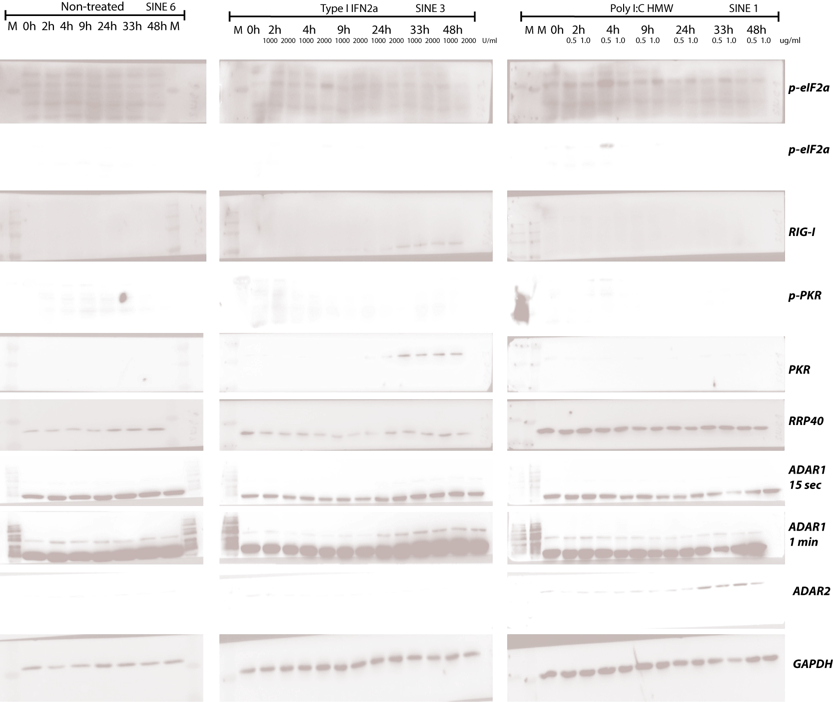

In [23]:
image_raw

In [24]:
grayscale_image = color.rgb2gray(
    img_as_float(image_raw)[:,:,:3]
)
threshold_value = filters.threshold_otsu(grayscale_image)
binary_image = grayscale_image > threshold_value
label_image = label(binary_image)
regions = iter([
    region
    for region
    in regionprops(label_image)
    if region.area >= 100
])

label_image = Image.fromarray(
    label_image.astype('uint8'),
    mode='P'
)

photo_label = ImageTk.PhotoImage(label_image)

label_label.configure(image=photo_label)
label_label.image = photo_label

In [25]:
if label_image is not None:
    color_map = ImageColor.colormap
    color_map['gray'] = (128, 128, 128)
    color_map['red'] = (255, 0, 0)
    color_map['green'] = (0, 255, 0)
    color_map['blue'] = (0, 0, 255)

    color_image = label_image
    color_image.putpalette(
        sum(
            [
                list(color_map[name])
                for name
                in ('gray', 'red', 'green', 'blue')
            ],
            []
        )
    )

    photo_label = ImageTk.PhotoImage(color_image)
    label_label.configure(image=photo_label)
    label_label.image = photo_label

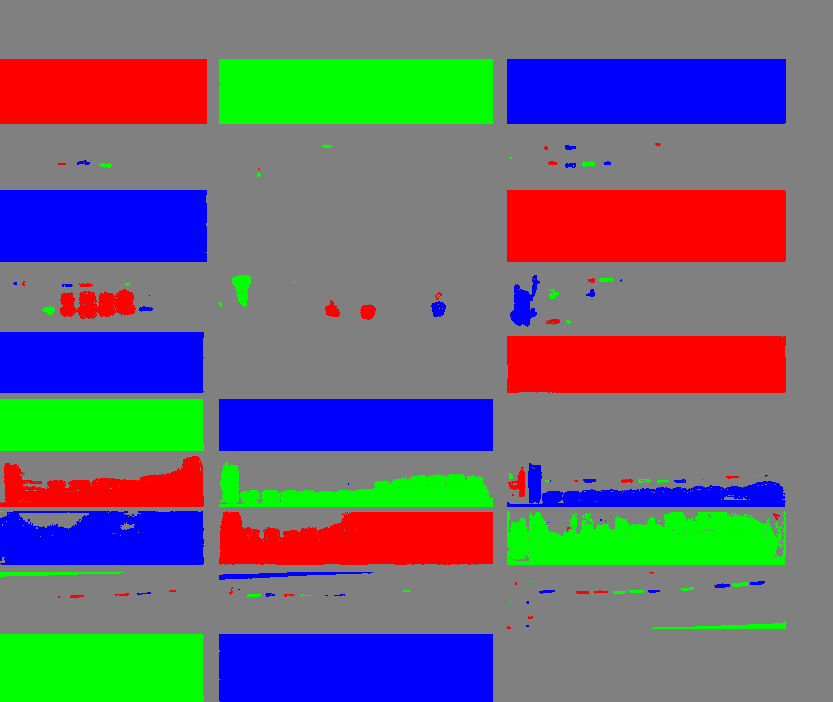

In [27]:
color_image
